In [161]:
import os

# install scikit image: sudo pip install -U scikit-image
from skimage.transform import resize
from skimage import io
from skimage import color
from skimage.filters import threshold_mean

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [162]:
# get file names in folder
directory = 'gimages/1/' # directory path of images
file_names = []
for f in os.listdir(directory):
    file_names.append(f)

In [163]:
# load images
images = []
resize_width = 50
resize_height = 50
resized_images = []
for f in file_names:
    try:
        img = io.imread(directory + f, as_grey=True)
        threshold = threshold_mean(img)
        img = img > threshold
        img = img.astype(float)
        resized_images.append(resize(img, (resize_width, resize_height), mode='edge').round())
    except IOError:
        pass
    except ValueError:
        pass

In [164]:
# save resized images (only to find errornous images)
resized_directory = 'resized_images/img' # directory path to store resized images 
errornous_images = []
for i in range(len(resized_images)):
    try:
        io.imsave(resized_directory + str(i) + '.png', resized_images[i])
    except ValueError:
        errornous_images.append(i)

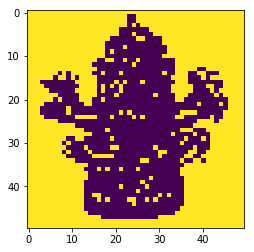

In [165]:
# test a resized image
for i in range(len(resized_images)):
    if i not in errornous_images:
        imgplot = plt.imshow(resized_images[i])
        plt.show()
        break

In [166]:
# flatten arrays
flattened_images = []
for i in range(len(resized_images)):
    if i not in errornous_images:
        flattened_images.append(resized_images[i].flatten())        
flattened_images = np.array(flattened_images)

when ploting, we can resize flattened images as img.reshape((width, height)) to get the original image.

In [167]:
# write to csv
df_images = pd.DataFrame(flattened_images)
df_images.to_csv('ganesh_preproecessed_images.csv', header=False, index=False)